In [243]:
import numpy as np
import pandas as pd
import csv

import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

# read csv into a dataframe
df_idf = pd.read_csv("DataSources/small_name_review_green.csv")
 
# print schema
print(df_idf.dtypes)
print(df_idf.shape)

Unnamed: 0        int64
name             object
review_text      object
green_boolean    object
dtype: object
(2000, 4)


In [247]:
#### first entry is a tattoo parlor
df_idf

,Unnamed: 0,name,review_text,green_boolean
0,0,GREEN NEW AMERICAN VEGETARIAN,absolutely love this place i ve been here man...,green
1,22797,BELLEVILLE ALE HOUSE,best bar is belleville inside and out this is...,green
2,22795,CHIN'S PAGODA CHINESE & AMERICAN RESTAURANT,if you are looking for a nice high class rest...,green
3,22793,ANNIE'S KITCHEN,annie s is not closed as i was there today fo...,green
4,22792,BEACH BAR & GRILL,we were pool beach side and service was easy ...,green
5,22791,ANNIE'S CAFE,my wife was super excited when she saw the hi...,green
6,22790,M FOR MACARON,i ll update the new flavours that i try i wen...,green
7,22787,LEMONGRASS KITCHEN,my parents and i have been visiting the dixie...,green
8,22785,POMPOM ROUGE,definitely worth the trip from chateauguay no...,green
9,22784,POMODORO,was in a hurry so this was a brief takeout ex...,green


In [245]:
green = df_idf.copy()
nongreen = df_idf.copy()

In [192]:
green = green[green['rating'].notnull()]
green.reset_index(inplace=True)
nongreen = nongreen[nongreen['rating'].isnull()]
nongreen.reset_index(inplace=True)

In [193]:
green.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
index     28 non-null int64
name      28 non-null object
text      28 non-null object
rating    28 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 976.0+ bytes


In [194]:
nongreen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
index     28 non-null int64
name      28 non-null object
text      28 non-null object
rating    0 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 976.0+ bytes


In [195]:
green = green.drop('rating', axis=1)
nongreen = nongreen.drop('rating', axis=1)

In [196]:
from nltk.stem import WordNetLemmatizer 
import re
def pre_process(text):
    # lowercase
    text=text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    return text

In [197]:
green['text'] = green['text'].apply(lambda x:pre_process(x))
nongreen['text'] = nongreen['text'].apply(lambda x:pre_process(x))

In [198]:
green.head()

,index,name,text
0,0,ARTISAN,met with sara today for a small coverup she w...
1,1,THE LOBSTER TRAP,i have been coming here for years and have to...
2,2,THE BREADFRUIT & RUM BAR,save your money and time it took over an hour...
3,3,SEVICHE,atmosphere nthe first word that came to mind ...
4,4,SEAFOOD SHACK,happy hour daily pm n nhappy hour specials ar...


In [199]:
#green['text'][2]

' save your money and time it took over an hour just to get our lunch served and there was hardly anyone in the restaurant even after expressing to our waiter that we were in a rush n nordered off the basic taste of the island menu the ripped banana was not only ripped but petrified and tasteless not impressed especially for a restaurant near the asu downtown campus lots of other places that serve good quality food at a reasonable time the restaurant is quaint very pretty unfortunately the food is not as good as the place looks and the prices are not to put with the food either too pricey for a mediocre meal the pork chop is so tough you would expect a soft cut and such but they didn t cook it well t was like eating shoe leather the crab cakes are just bread barely any crab such a rip off they should invest on providing quality food having such a cute place the server was confused and scattered my whole party was unimpressed with the food would not recommend for food but only for drink

In [200]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", 
              "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", 
              "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
              "their", "theirs", "themselves", "what", "which", "who", "whom", "this", 
              "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", 
              "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", 
              "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", 
              "of", "at", "by", "for", "with", "about", "against", "between", "into", 
              "through", "during", "before", "after", "above", "below", "to", "from", 
              "up", "down", "in", "out", "on", "off", "over", "under", "again", "further",
              "then", "once", "here", "there", "when", "where", "why", "how", "all", 
              "any", "both", "each", "few", "more", "most", "other", "some", "such", 
              "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
              "s", "t", "can", "will", "just", "don", "should", "now", "also",
              'us', 've','nthe','thru','ni','didn','even','ever','every','would','got','re']

def remove_stopwords(mytext):
    #stop_words = set(stopwords.words('english')) 
        
    word_tokens = word_tokenize(mytext) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    
    return filtered_sentence

In [201]:
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join(lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text))

In [202]:
#clean will have no stopwords, mydfidf will
resultgreen = green.copy()
resultnongreen = nongreen.copy()

In [203]:
resultgreen['text'] = resultgreen['text'].apply(lambda x:remove_stopwords(x))
resultnongreen['text'] = resultnongreen['text'].apply(lambda x:remove_stopwords(x))

In [204]:
resultgreen['text'] = resultgreen['text'].str.join(' ')
resultnongreen['text'] = resultnongreen['text'].str.join(' ')

In [205]:
resultgreen['text_lemmatized'] = resultgreen.text.apply(lemmatize_text)
resultnongreen['text_lemmatized'] = resultnongreen.text.apply(lemmatize_text)

In [206]:
#resultgreen.head()

In [207]:
#resultnongreen.head()

In [208]:
#resultgreen['text_lemmatized'][2]

In [209]:
#resultgreen.text_lemmatized = ' '.join(resultgreen.text_lemmatized)

In [210]:
from sklearn.feature_extraction.text import TfidfVectorizer
greenvectorizer = TfidfVectorizer(max_features=100, smooth_idf=True, )#tokenizer=tokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)
nongreenvectorizer = TfidfVectorizer(max_features=100, smooth_idf=True, )#tokenizer=tokens ,use_idf=True, smooth_idf=True, sublinear_tf=False)



In [211]:
greenmatrix = greenvectorizer.fit_transform(resultgreen['text'])
nongreenmatrix = nongreenvectorizer.fit_transform(resultnongreen['text'])

In [212]:
print(greenvectorizer.get_feature_names())

['always', 'another', 'area', 'around', 'ask', 'asked', 'back', 'bad', 'bar', 'best', 'better', 'busy', 'came', 'cheese', 'chicken', 'come', 'could', 'customer', 'day', 'delicious', 'drink', 'drinks', 'drive', 'eat', 'experience', 'fast', 'first', 'food', 'fresh', 'friendly', 'fries', 'get', 'give', 'go', 'going', 'good', 'great', 'hot', 'know', 'last', 'like', 'little', 'lobster', 'location', 'long', 'love', 'made', 'make', 'manager', 'mcdonald', 'mcdonalds', 'meal', 'menu', 'minutes', 'much', 'never', 'new', 'nice', 'night', 'one', 'order', 'ordered', 'people', 'place', 'pretty', 'really', 'restaurant', 'right', 'said', 'sauce', 'say', 'see', 'server', 'service', 'shrimp', 'since', 'something', 'staff', 'still', 'sure', 'table', 'take', 'think', 'time', 'times', 'told', 'took', 'try', 'two', 'wait', 'waiting', 'want', 'wasn', 'way', 'well', 'went', 'wings', 'work', 'worst', 'wrong']


In [213]:
print(nongreenvectorizer.get_feature_names())

['always', 'amazing', 'area', 'around', 'back', 'bad', 'beef', 'best', 'better', 'bit', 'bowl', 'cake', 'came', 'cheese', 'chicken', 'chocolate', 'come', 'could', 'definitely', 'delicious', 'dessert', 'different', 'dishes', 'eat', 'everything', 'first', 'food', 'fresh', 'friendly', 'gelato', 'get', 'give', 'go', 'going', 'good', 'great', 'hot', 'korean', 'like', 'little', 'lot', 'love', 'lunch', 'made', 'make', 'many', 'meal', 'meat', 'menu', 'much', 'never', 'new', 'nice', 'night', 'one', 'order', 'ordered', 'people', 'pizza', 'place', 'places', 'pork', 'pot', 'pretty', 'price', 'quality', 'really', 'recommend', 'restaurant', 'rice', 'right', 'said', 'salad', 'sauce', 'say', 'service', 'side', 'small', 'soup', 'spicy', 'staff', 'still', 'super', 'sure', 'sweet', 'table', 'take', 'taste', 'think', 'though', 'time', 'tried', 'try', 'two', 'want', 'wasn', 'way', 'well', 'went', 'wings']


In [214]:
print(greenmatrix.shape)

(28, 100)


In [215]:
print(nongreenmatrix.shape)

(28, 100)


# Wordcloud

In [216]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

In [217]:
#?WordCloud

In [218]:
mytext = resultgreen.text_lemmatized[2] #= resultnongreen.text_lemmatized.replace('[','').replace(']','')
mytext = ' '.join(mytext)
#print(mytext)

In [219]:
#resultnongreen.text_lemmatized

In [231]:
#update stopword list:
#stopwords = set(STOPWORDS)
stop_words.extend(['order','great','go','come','like','one','say','take','food','drink','good','place'])#"drink", "now", "wine", "flavor", "flavors"])


In [241]:
# Start with one review:
#greentext = resultgreen.text_lemmatized[2]
# Create and generate a word cloud image:
#wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(greentext)
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [242]:
# Start with one review:
#nongreentext = resultnongreen.text_lemmatized[2]
# Create and generate a word cloud image:
#wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(greentext)
# Display the generated image:
#plt.imshow(wordcloud, interpolation='bilinear') 
#plt.axis("off")
#plt.show()

In [227]:
#resultnongreen.text_lemmatized[0]

In [237]:
greentext = " ".join(review for review in resultgreen.text_lemmatized)
print ("There are {} words in the combination of all review.".format(len(greentext)))

There are 10577767 words in the combination of all review.


In [238]:
nongreentext = " ".join(review for review in resultnongreen.text_lemmatized)
print ("There are {} words in the combination of all review.".format(len(nongreentext)))

There are 556283 words in the combination of all review.


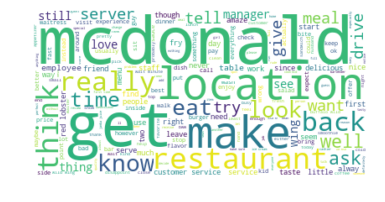

In [239]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(greentext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()

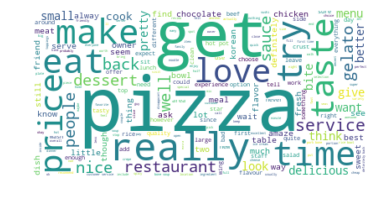

In [240]:
# Create and generate a word cloud image:
wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(nongreentext)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off")
plt.show()